## Bombcell getting started script

to do:
- JF: add MATLAB changes (spikeGLX meta)
- JF: generate output plots
- move all the squeeze() and astype() to the loading function
- what are the errors / warnings in the main function?
- how to load output, check and modify param, then re-generate + save
- double check no hard-coding
- double check all python names are copies of MATLAB with snake_case
- check comments & function headers

## Install bombcell

Create a conda environment
```bash
conda create -n bombcell python=3.11
conda activate bombcell
```
Clone latest bombcell repository from github
```bash
git clone https://github.com/Julie-Fabre/bombcell.git
```
Install bombcell from local repository
```bash
cd bombcell/pyBombCell
# you could do `pip install .`, but uv is much quicker!
pip install uv
uv pip install . # or uv pip install -e . in editable mode
```

## Imports

In [1]:
import os, sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add bombcell to Python path if NOT installed with pip
# Use this if notebook running in bombcell repo
demo_dir = Path(os.getcwd())
pyBombCell_dir = demo_dir.parent
# Else, use this
# pyBombCell_dir = "path/to/bombcell/repository/root"
sys.path.append(str(pyBombCell_dir))

In [2]:
%load_ext autoreload
%autoreload 2

import bombcell as bc

/home/maxime/anaconda3/envs/bombcell/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Define data paths

By default: path to BombCell's toy dataset

In [3]:
# Replace with your kilosort directory
ks_dir = "/media/maxime/AnalysisSSD/pc-cnc/loco_dpdt/21-04-05_DK260_day1/21-04-05_DK260_day1_probe1" # demo_dir / "toy_data"  

# Leave 'None' if no raw data
raw_dir = None

# Replace with the relative directory in which you want to save bombcell's output
save_path = "test"  

#raw_file = "/home/netshare/znas-lab/Share/JulieF/for_sam/JF093_2023-03-06_site1/site1/2023-03-06_JF093_1_g0_t0_bc_decompressed.imec0.ap.bin"

# For non-Neuropixels probes, specify conversion factor to uV
gain_to_uV = None # np.nan

## Get parameters

In [4]:
# ephys_raw_data and gain_to_uv will be None if no raw_dir given
ephys_raw_data, meta_path, gain_to_uV = bc.manage_if_raw_data(raw_dir, gain_to_uV)

param = bc.get_default_parameters(ks_dir, raw_file=ephys_raw_data, ephys_meta_dir=meta_path)
param["compute_distance_metrics"] = 0
param["compute_drift"] = 0
param["compute_time_chunks"] = 0

## Run bombcell, get unit types and save results 
To save results as a parquet either PyArrow or FastParquet needs to be installed

Computing bombcell quality metrics: 100%|██████████| 291/291 units


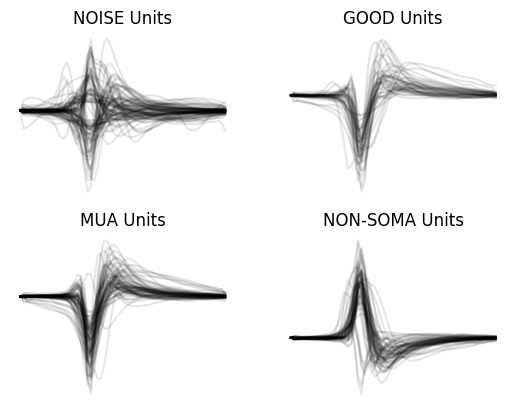

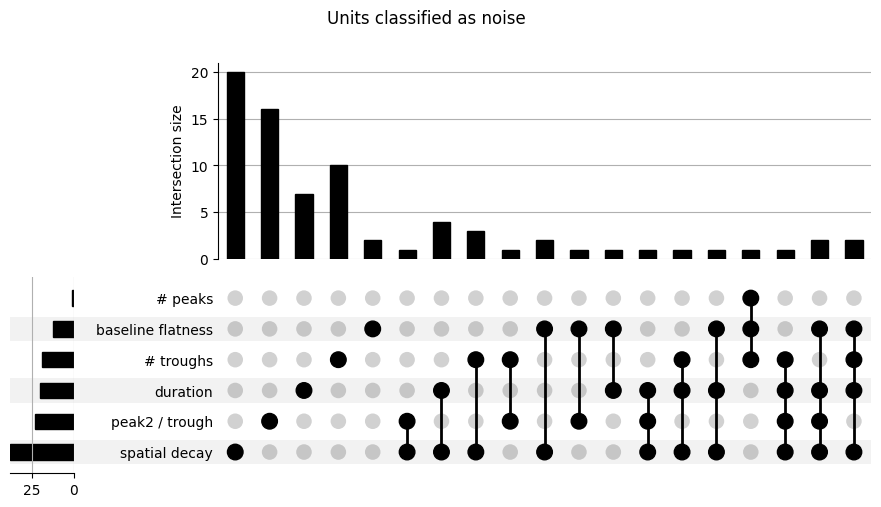

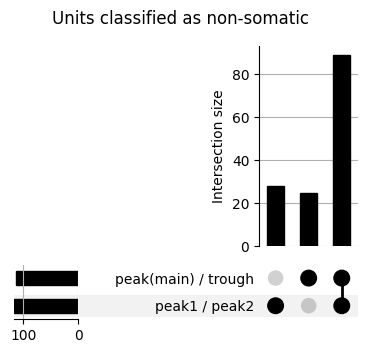

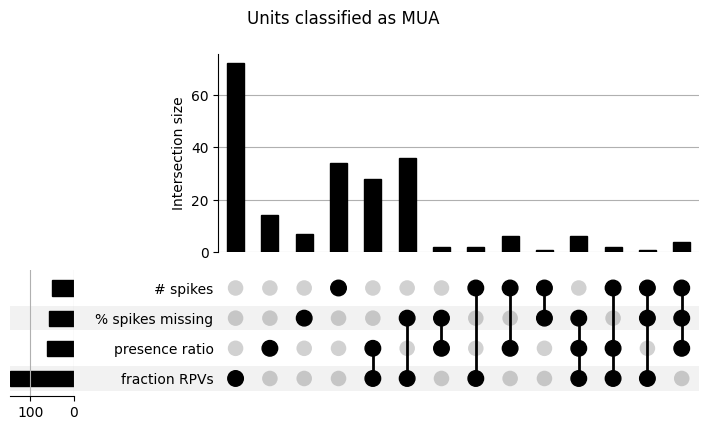

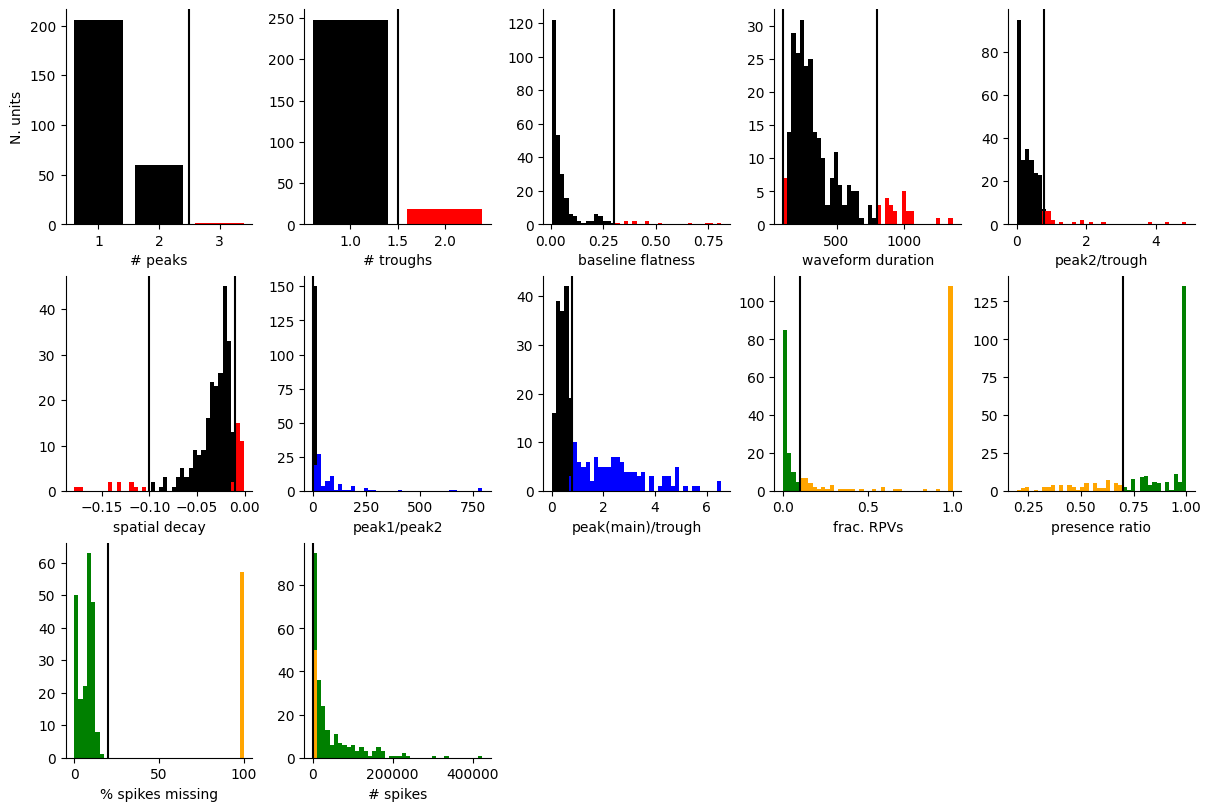

UnboundLocalError: cannot access local variable 'raw_waveforms_id_match' where it is not associated with a value

In [10]:
param['re_extract_raw'] = False
(
    quality_metrics,
    param,
    unit_type,
    unit_type_string,
) = bc.run_bombcell(
    ks_dir, raw_dir, save_path, param
)

In [12]:
%debug

> /media/maxime/ut_data/Dropbox/Science/bombcell/pyBombCell/bombcell/helper_functions.py(818)run_bombcell()
    816         raw_waveforms_peak_channel,
    817         raw_waveforms_id_match,
--> 818         save_path,
    819     )  # JF: this should be inside bc.get_all_quality_metrics
    820 

*** NameError: name 'raw_waveforms_id_match' is not defined
*** NameError: name 'raw_waveforms_id_match' is not defined


(optional) look at a table which shows why each unit fails

In [7]:
qm_table = bc.make_qm_table(
    quality_metrics, param, unit_type_string
)
qm_table


NameError: name 'quality_metrics' is not defined